In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

import sqlite3
connection = sqlite3.connect("./database/bdfinal.sql")

In [2]:
columns = "o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_3pm,\
    d_3pa,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,tmORB,tmDRB,tmTRB,opptmORB,opptmDRB,opptmTRB,won,lost,GP,homeW,homeL,\
        awayW,awayL,confW,confL,min,attend,firstRound,semis,finals"

query_test = "SELECT year, playoff, seeded, " + columns + " FROM Teams WHERE year = 10"
query_train = "SELECT year, playoff, seeded, " + columns + " FROM Teams WHERE year <> 10"

train_data = pd.read_sql(query_train,connection)

categorical_columns = ["firstRound", "semis", "finals"]
for col in categorical_columns:
    train_data[col] = train_data[col].astype('category')

train_data= pd.get_dummies(train_data, columns=categorical_columns)
train_inputs = train_data.loc[:, train_data.columns != "playoff"].values
train_labels = train_data["playoff"].values

test_data = pd.read_sql(query_test,connection)
for col in categorical_columns:
    test_data[col] = test_data[col].astype('category')
test_data = pd.get_dummies(test_data,columns=categorical_columns)
test_inputs = test_data.loc[:, test_data.columns != "playoff"].values
test_labels = test_data["playoff"].values

print(train_inputs)
print(train_labels)
print(test_inputs)
print(test_labels)



[[9 0 895 ... True False False]
 [1 0 812 ... True False False]
 [2 0 746 ... False True False]
 ...
 [7 0 1016 ... True False False]
 [8 0 877 ... True False False]
 [9 0 885 ... True False False]]
['N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N'
 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y'
 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N'
 'Y' 'N' 'N']
[[10 0 1089 2428 569 755 114 374 404 855 1259 547 741 329 590 121 2861
  996 2363 624 807 181 530 353 821 1174 615 700 347 601 133 2797 0 0 0 0
  0 0 18 16 34 12 5 6 11 10 12 6950 120737 False True False True False
  False True False False]
 [10 0 930 2136 527 693 186 471 307

[Text(0.5, 0.75, 'x[49] <= 0.5\ngini = 0.493\nsamples = 129\nvalue = [57, 72]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 72\nvalue = [0, 72]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 57\nvalue = [57, 0]')]

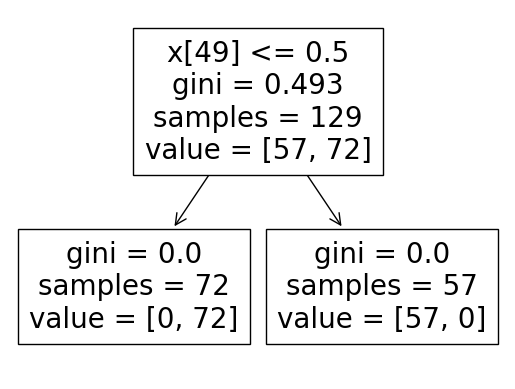

In [3]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(train_inputs,train_labels)
clf.score(test_inputs,test_labels)
tree.plot_tree(clf)

## Outliers from PLAYERS

{'whiskers': [<matplotlib.lines.Line2D at 0x1c24692f390>,
 'caps': [<matplotlib.lines.Line2D at 0x1c24693cb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c246916d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1c24693e050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c24693ea90>],
 'means': []}

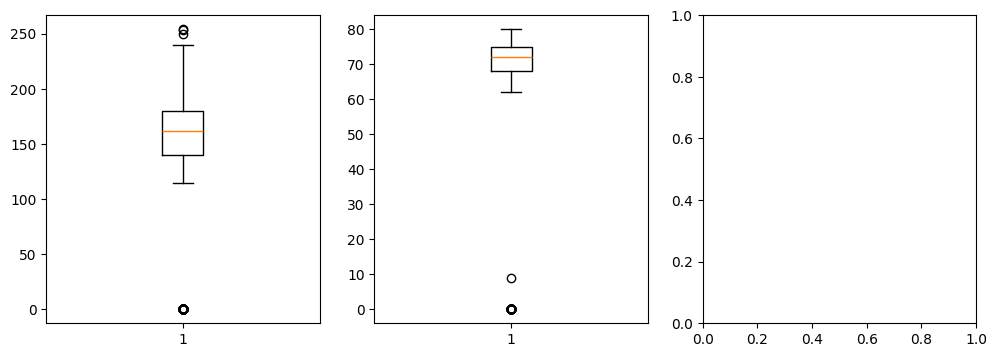

In [4]:
query = "SELECT * from players"

df = pd.read_sql(query,connection)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].boxplot(df["weight"])

axs[1].boxplot(df["height"])




## Outliers from PLAYERS_TEAMS

,year,stINTEGER,GP,GS,minutes,points,oRebounds,dRebounds,rebounds,assists,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,...,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,5.326226,0.113539,24.320896,12.438166,501.269190,176.261727,24.388060,54.334755,78.722814,39.031983,...,0.759062,2.623134,3.735075,12.282516,5.149254,3.672708,2.822495,2.924307,1.019723,0.026652
std,2.905475,0.422574,10.460614,13.641697,359.566117,161.983839,23.325974,48.347088,69.210226,40.147037,...,2.280011,5.037807,6.697874,24.313379,10.726421,8.463917,6.723170,7.751034,2.992637,0.170751
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,17.000000,0.000000,165.000000,41.000000,6.000000,15.000000,21.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,29.000000,5.000000,459.000000,129.000000,18.000000,42.000000,63.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,0.000000,32.000000,29.000000,826.250000,284.000000,36.000000,83.000000,119.000000,57.250000,...,0.000000,3.000000,5.000000,15.000000,6.000000,4.000000,2.000000,1.000000,0.000000,0.000000
max,10.000000,3.000000,34.000000,34.000000,1234.000000,860.000000,162.000000,276.000000,363.000000,236.000000,...,31.000000,34.000000,43.000000,188.000000,82.000000,68.000000,62.000000,85.000000,32.000000,2.000000


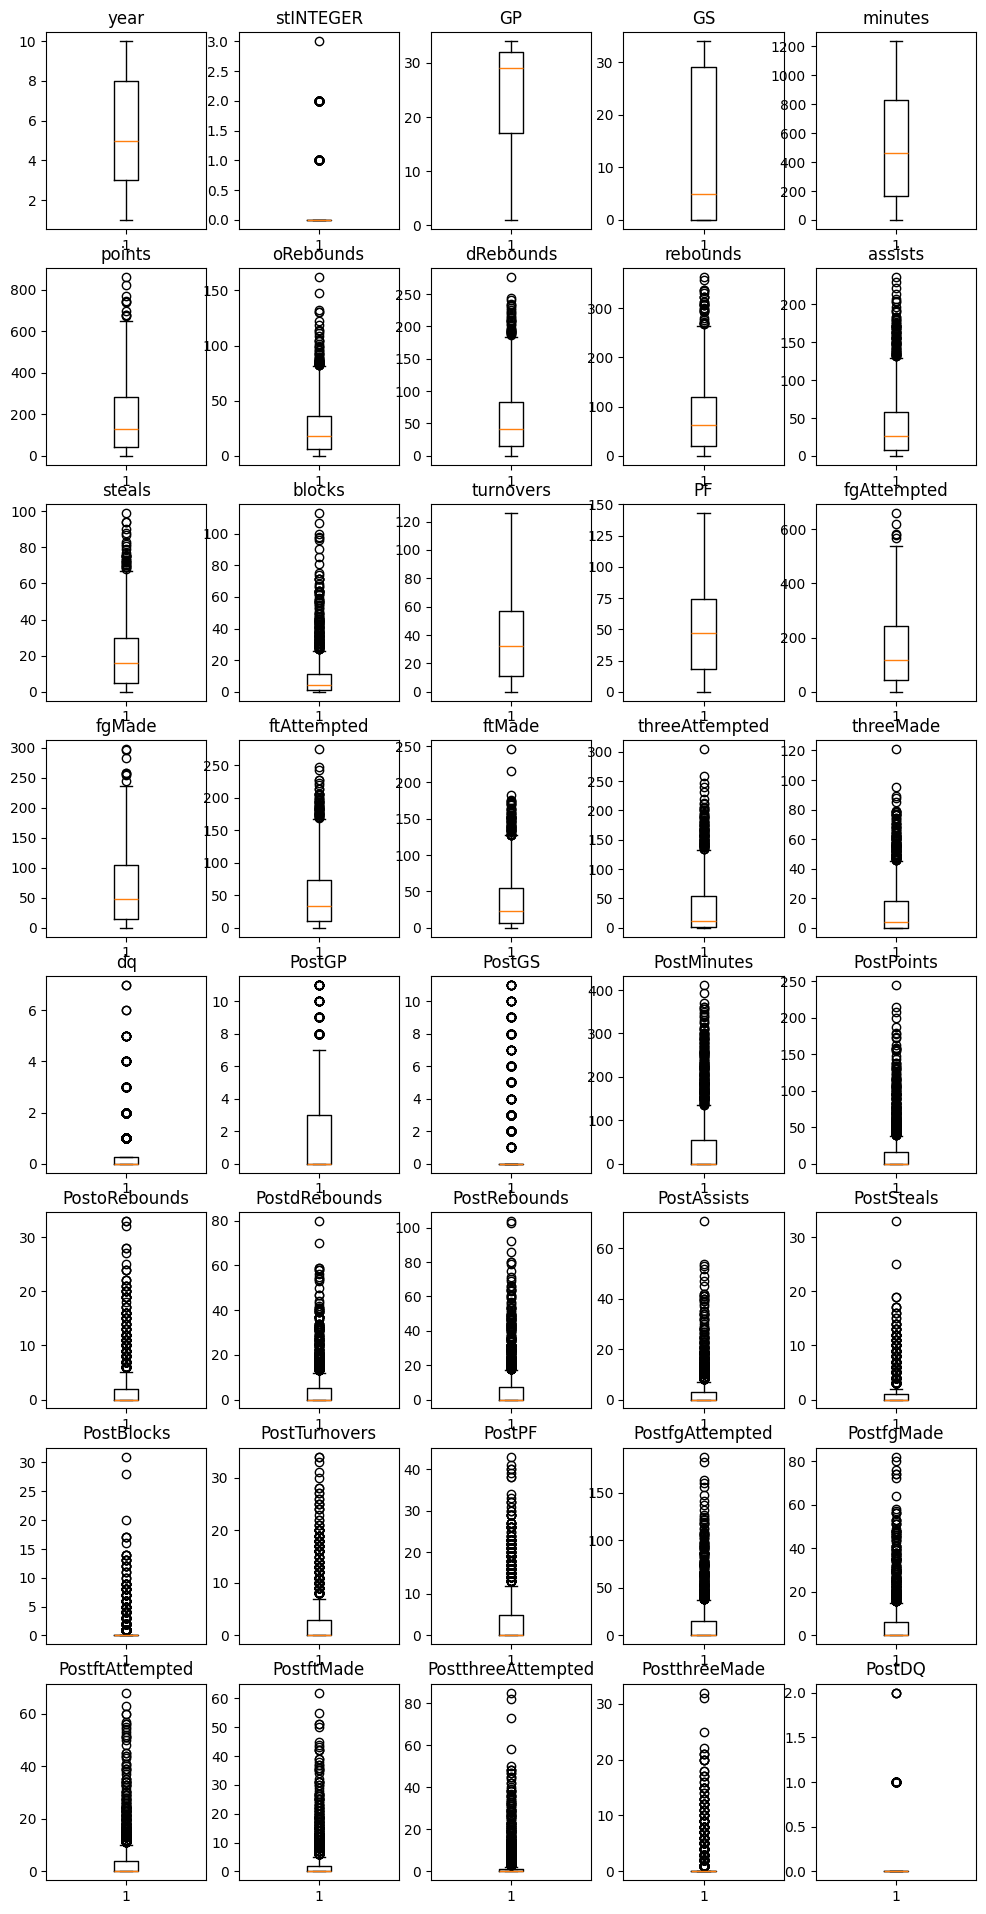

In [5]:
query = "SELECT * from players_teams"
df = pd.read_sql(query,connection)


columns = df.select_dtypes(include=['float64','int64']).columns

num_rows = columns.size // 5 
if columns.size % 5 != 0:
    num_rows += 1

fig, axs = plt.subplots(num_rows,5, figsize=(12, num_rows*3))

for i, column in enumerate(columns):
    row = i // 5
    col = i % 5
    axs[row, col].boxplot(df[column])
    axs[row, col].set_title(column)
    

    